**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [ ]:
# Load the data
data = pd.read_excel("aggregateRockData-1.xlsx", usecols=[1],names=["rock category"])
features = pd.read_csv("norm540.txt", sep='\t', usecols=list(range(3, 22)))

In [ ]:
# Assign meaningful column names
attribute_names = [
    "Porphyritic texture",
    "Presence of holes",
    "Salient green hue",
    "Pegmatitic texture",
    "Conchoidal fracture",
    "Angular fragments",
    "Rounded fragments",
    "Straight stripes",
    "Curved stripes",
    "Physical layers",
    "Veins",
    "Oily/shimmery texture",
    "Splotchy texture",
    "Single translucent crystal",
    "Multiple cubic crystals",
    "Sandy texture",
    "Fragments (disjunctive)",
    "Stripes (disjunctive)",
    "Crystals (disjunctive)"
]

features.columns = attribute_names

**Statistical descriptions**

In [ ]:
# Display summary statistics
statistics = features.describe()
print(statistics)

       Porphyritic texture  Presence of holes  Salient green hue  \
count           539.000000         539.000000         539.000000   
mean             -0.003136           0.000296           0.001199   
std               0.998267           1.000905           1.000541   
min              -1.321491          -0.407623          -1.187950   
25%              -0.823647          -0.407623          -0.761505   
50%              -0.300910          -0.407623          -0.375197   
75%               0.757010          -0.159688           0.585557   
max               2.422299           4.551072           2.750390   

       Pegmatitic texture  Conchoidal fracture  Angular fragments  \
count          539.000000           539.000000         539.000000   
mean             0.000467             0.001131          -0.001076   
std              1.000870             1.000583           1.000616   
min             -1.322715            -1.248012          -0.436004   
25%             -0.804631            -0.69

**Visualizations**

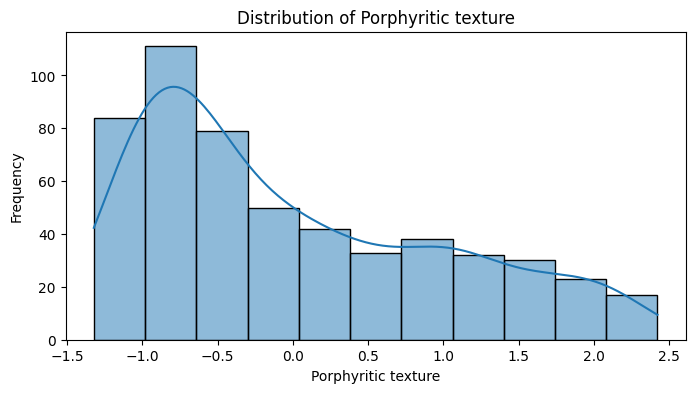

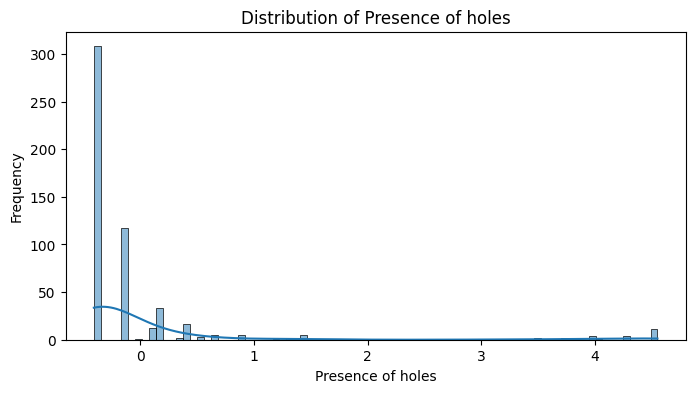

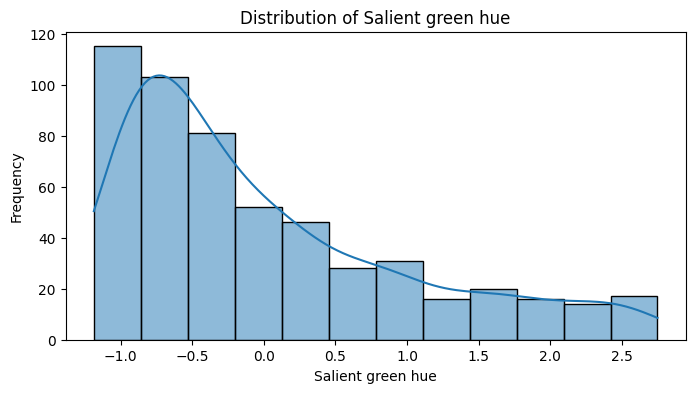

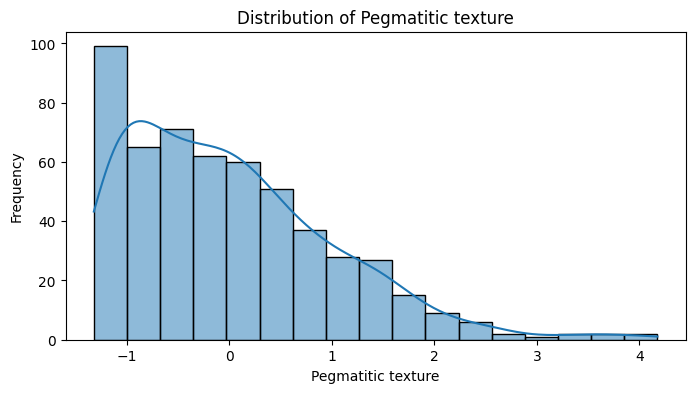

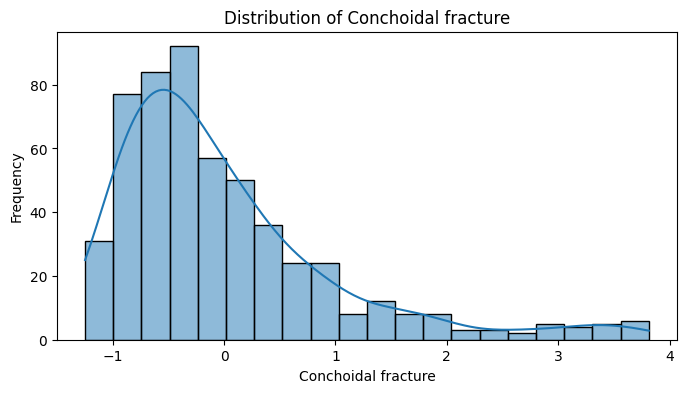

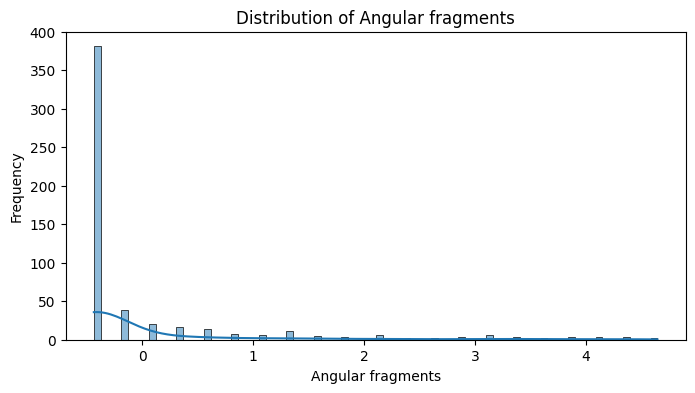

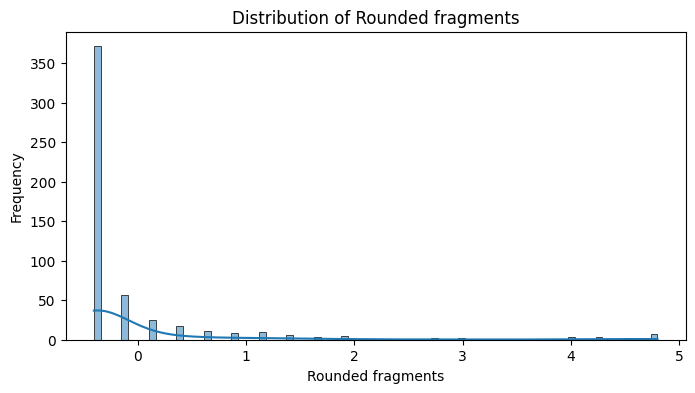

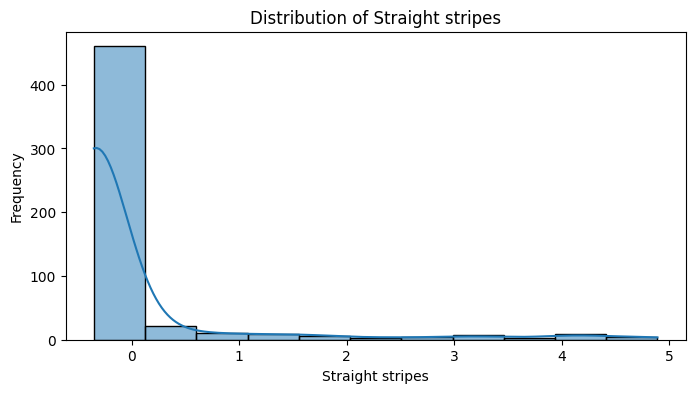

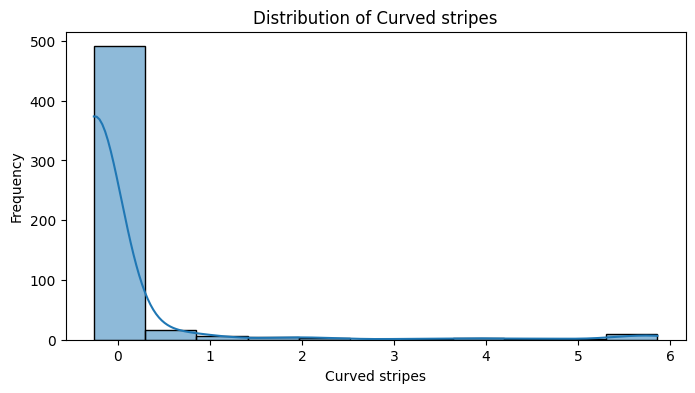

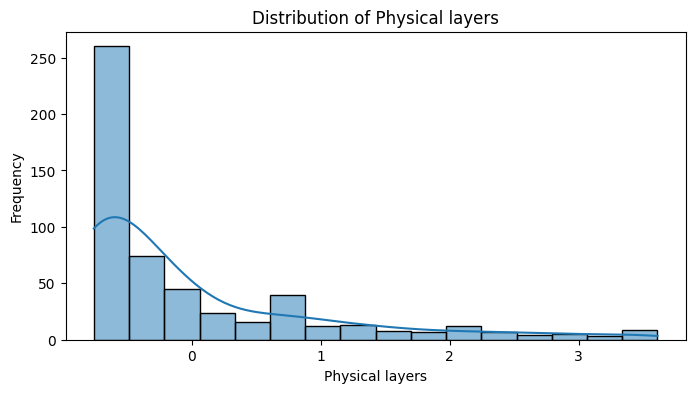

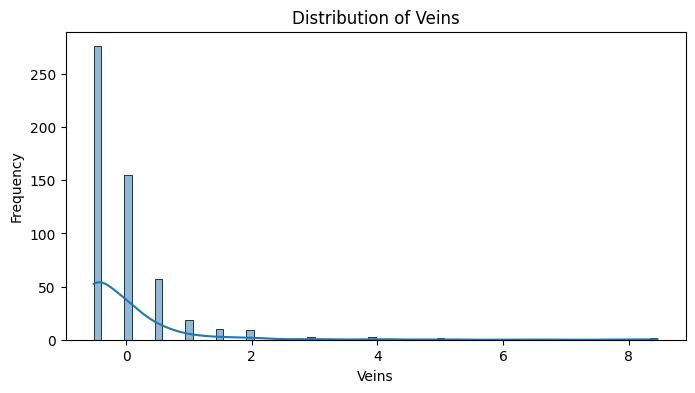

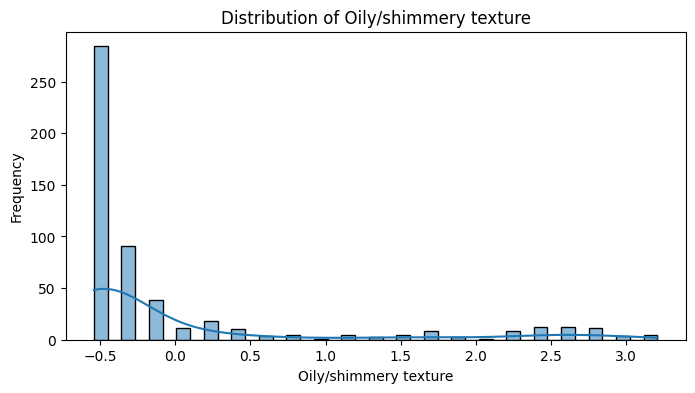

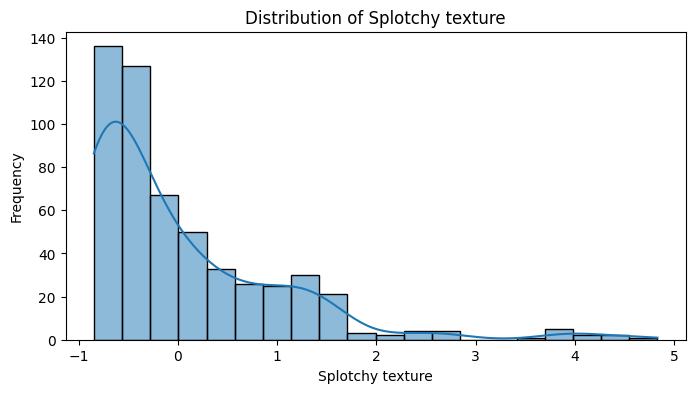

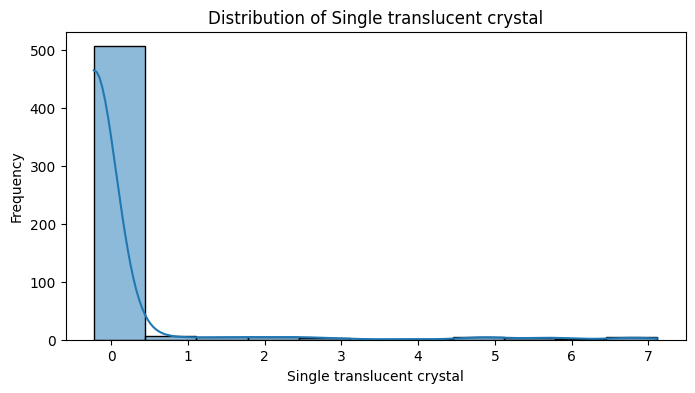

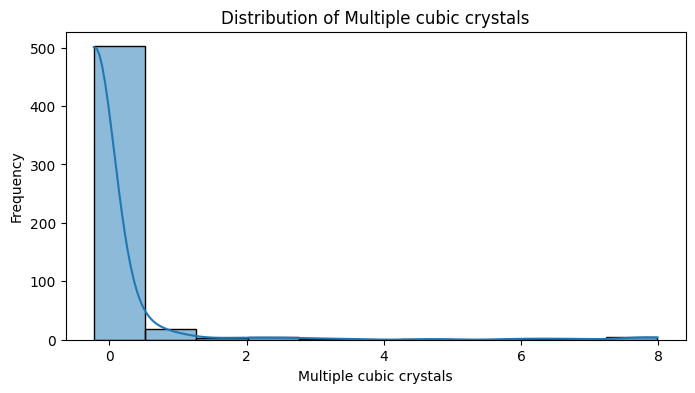

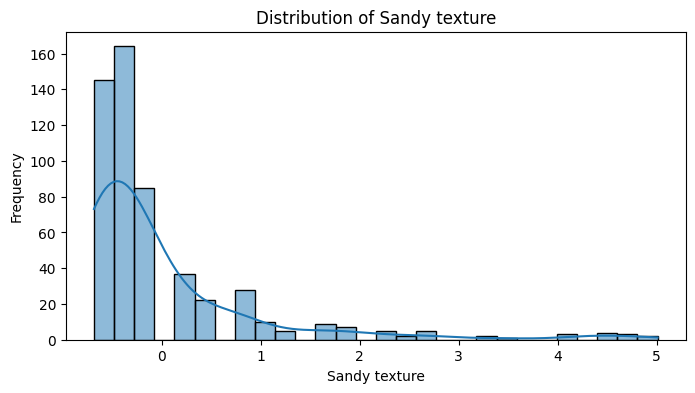

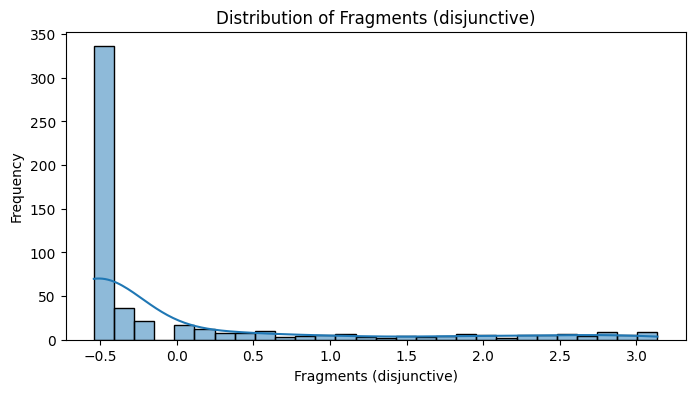

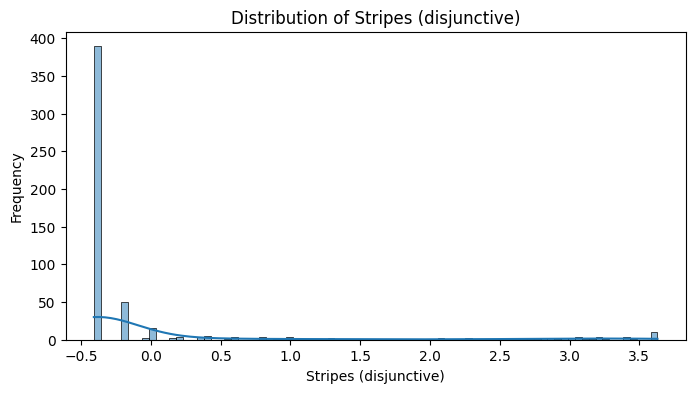

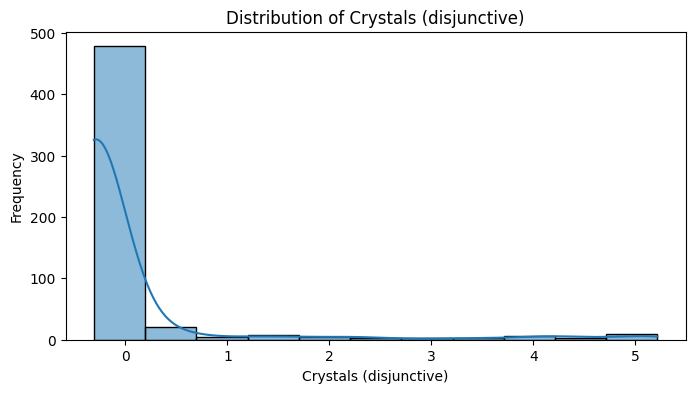

In [ ]:
# Plot histograms for each attribute
for column in features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(features[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# If any special treatment required

Based on our analysis of the histograms, it becomes apparent that all the attributes exhibit a right-skewed distribution. Notably, certain attributes such as angular fragments, rounded fragments, and veins demonstrate analogous distribution patterns. Conversely, attributes like crystals, stripes, multiple cubic crystals, and single translucent crystals exhibit a marked preponderance of lower values and an absence of higher values in their frequency distribution.

To rectify this skewness in our data, we applied a square root transformation to the attributes. This transformation was chosen with the aim of achieving symmetry in the attribute distributions, given their pronounced right-skewed nature.

In [ ]:
import numpy as np

# Create a list of column names (attributes) in your dataset
attribute_columns = features.columns

# Apply a square root transformation to each attribute
for attr in attribute_columns:
    # Check if the attribute is numeric (e.g., not a label)
    if np.issubdtype(features[attr].dtype, np.number):
        features[attr] = np.sqrt(features[attr])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


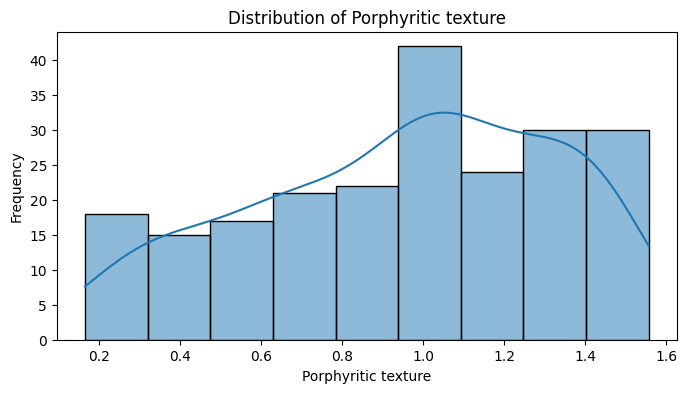

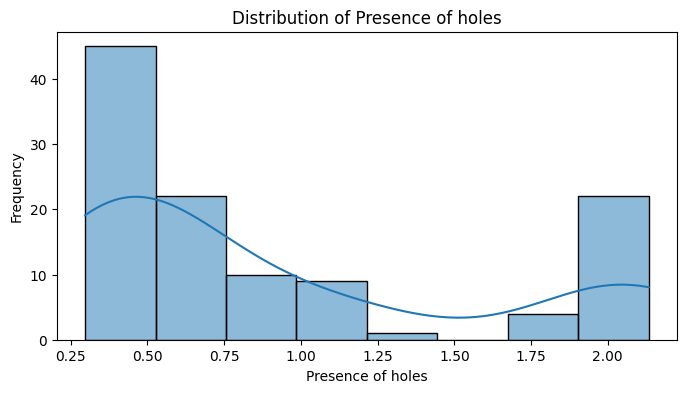

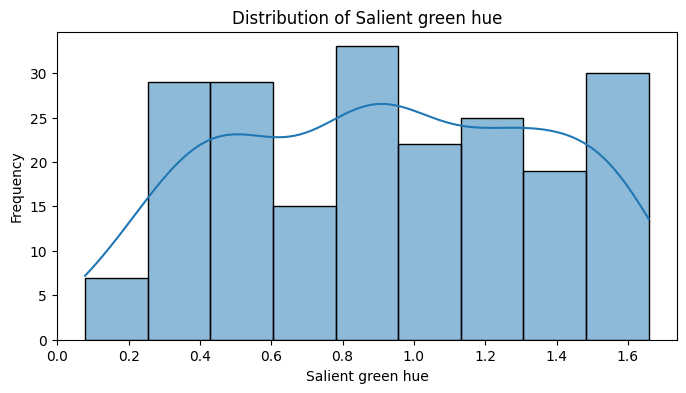

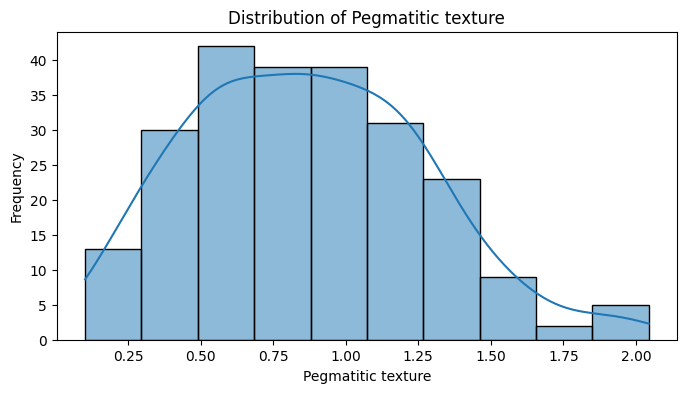

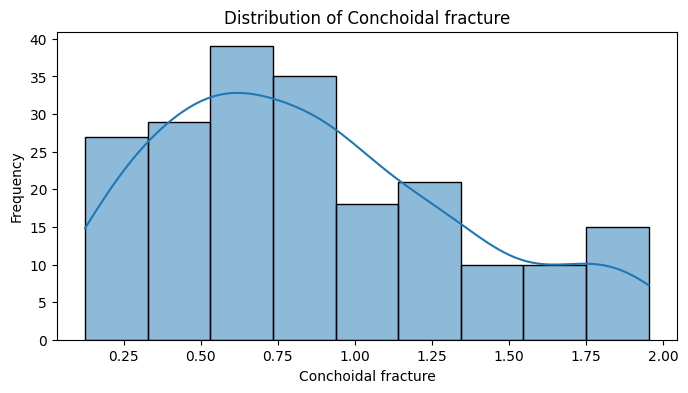

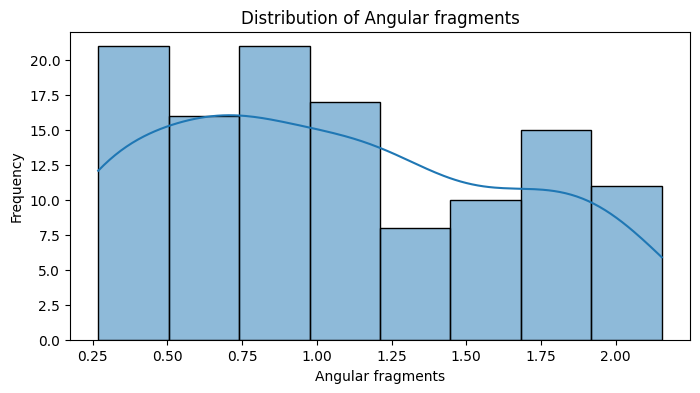

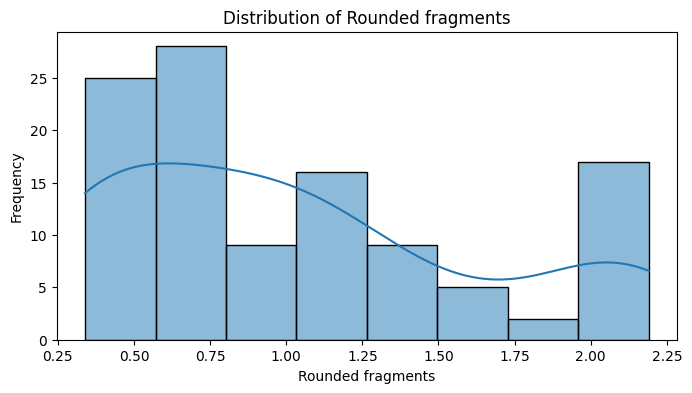

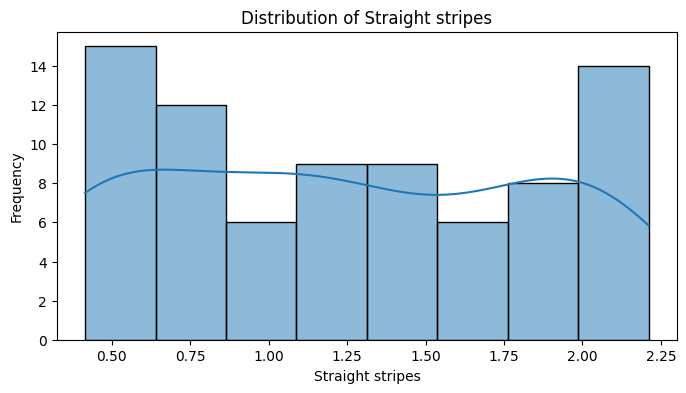

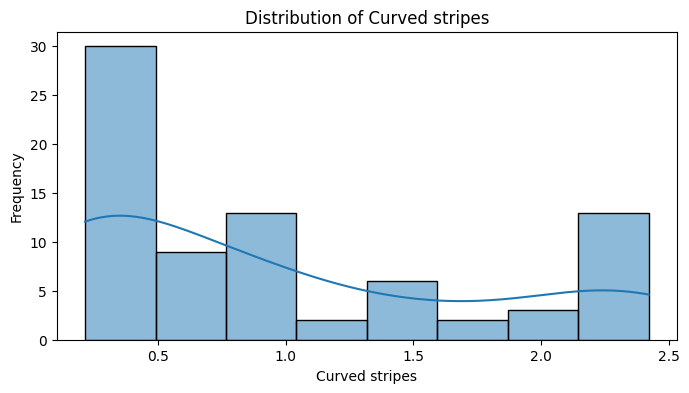

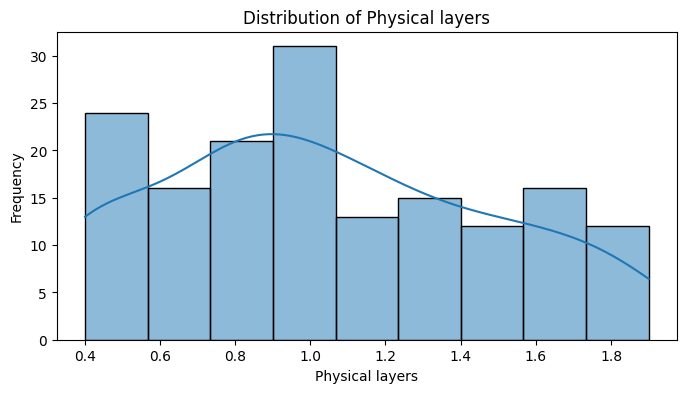

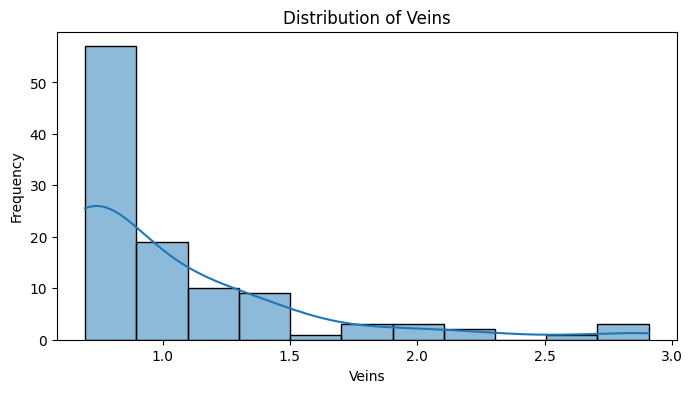

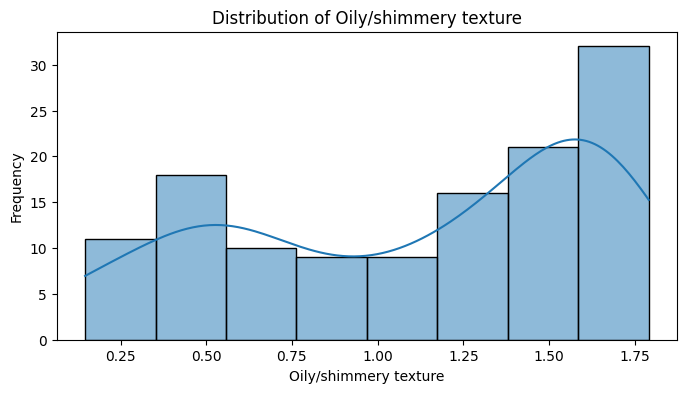

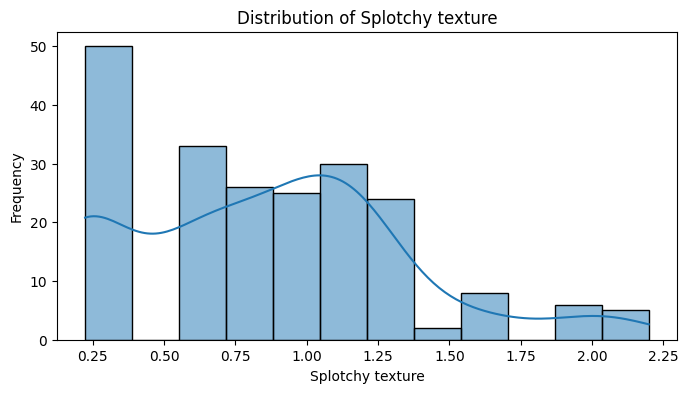

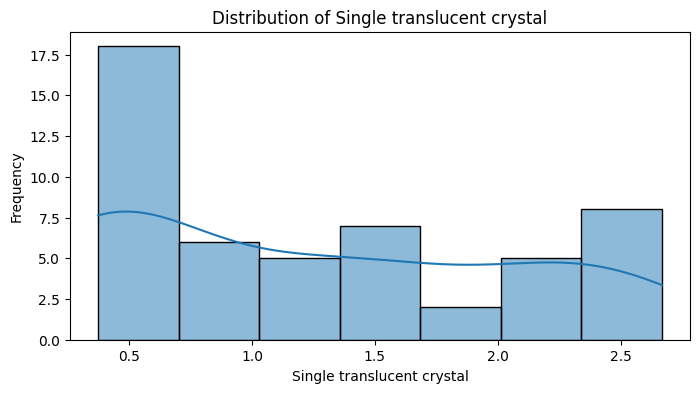

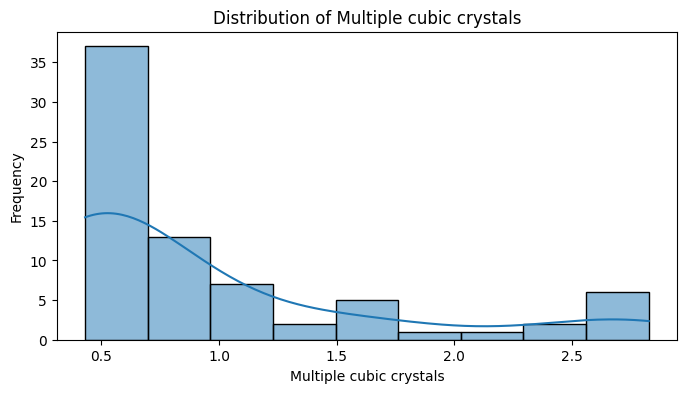

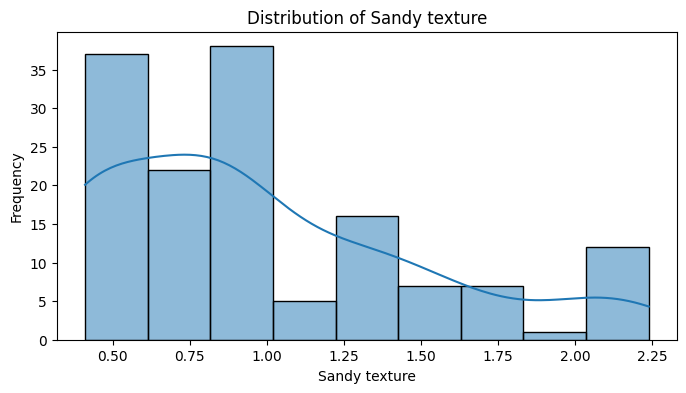

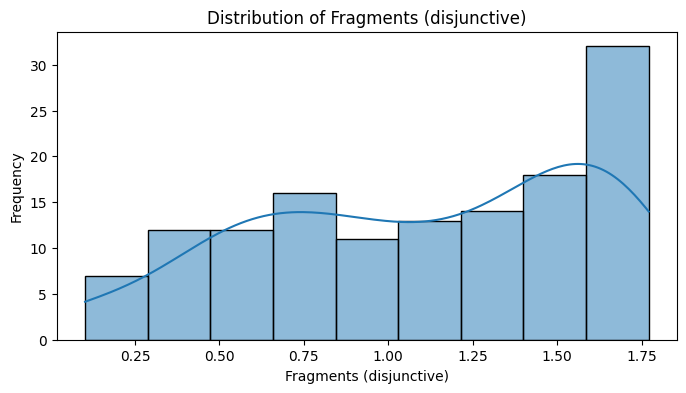

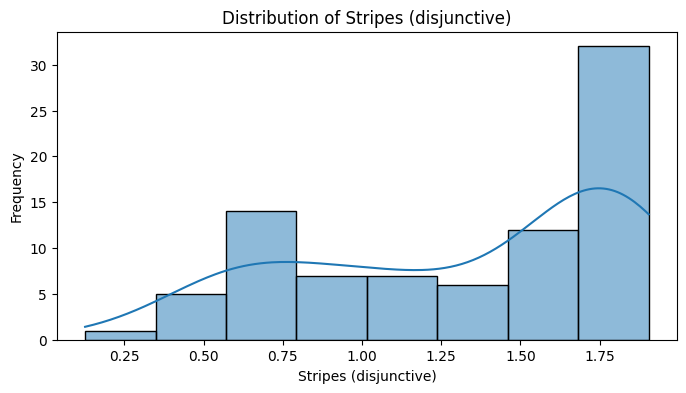

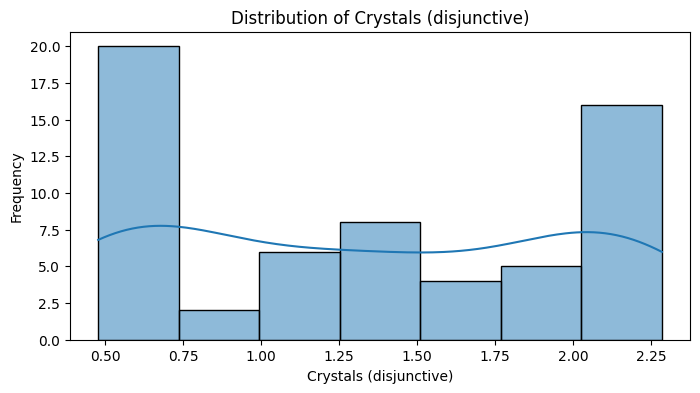

In [ ]:
# Plot histograms for each attribute
for column in features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(features[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Form the above histograms, we can see the skewness is removed.

In [ ]:
#looking for if there are any null values in the dataset
features.isnull().sum()

Porphyritic texture           320
Presence of holes             426
Salient green hue             330
Pegmatitic texture            306
Conchoidal fracture           335
Angular fragments             420
Rounded fragments             428
Straight stripes              460
Curved stripes                461
Physical layers               379
Veins                         431
Oily/shimmery texture         413
Splotchy texture              330
Single translucent crystal    488
Multiple cubic crystals       465
Sandy texture                 394
Fragments (disjunctive)       404
Stripes (disjunctive)         455
Crystals (disjunctive)        478
dtype: int64

**2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots**.

**Computing the PCC &  Scatter Plots**

                            Porphyritic texture  Presence of holes  \
Porphyritic texture                    1.000000          -0.226835   
Presence of holes                     -0.226835           1.000000   
Salient green hue                      0.220720          -0.016403   
Pegmatitic texture                     0.123277          -0.101623   
Conchoidal fracture                    0.030752          -0.459924   
Angular fragments                      0.479444          -0.048545   
Rounded fragments                      0.509510          -0.255673   
Straight stripes                      -0.089885           0.713204   
Curved stripes                        -0.432069          -0.882783   
Physical layers                       -0.854029          -0.364786   
Veins                                 -0.091887                NaN   
Oily/shimmery texture                 -0.162138          -0.342422   
Splotchy texture                      -0.221707          -0.183036   
Single translucent c

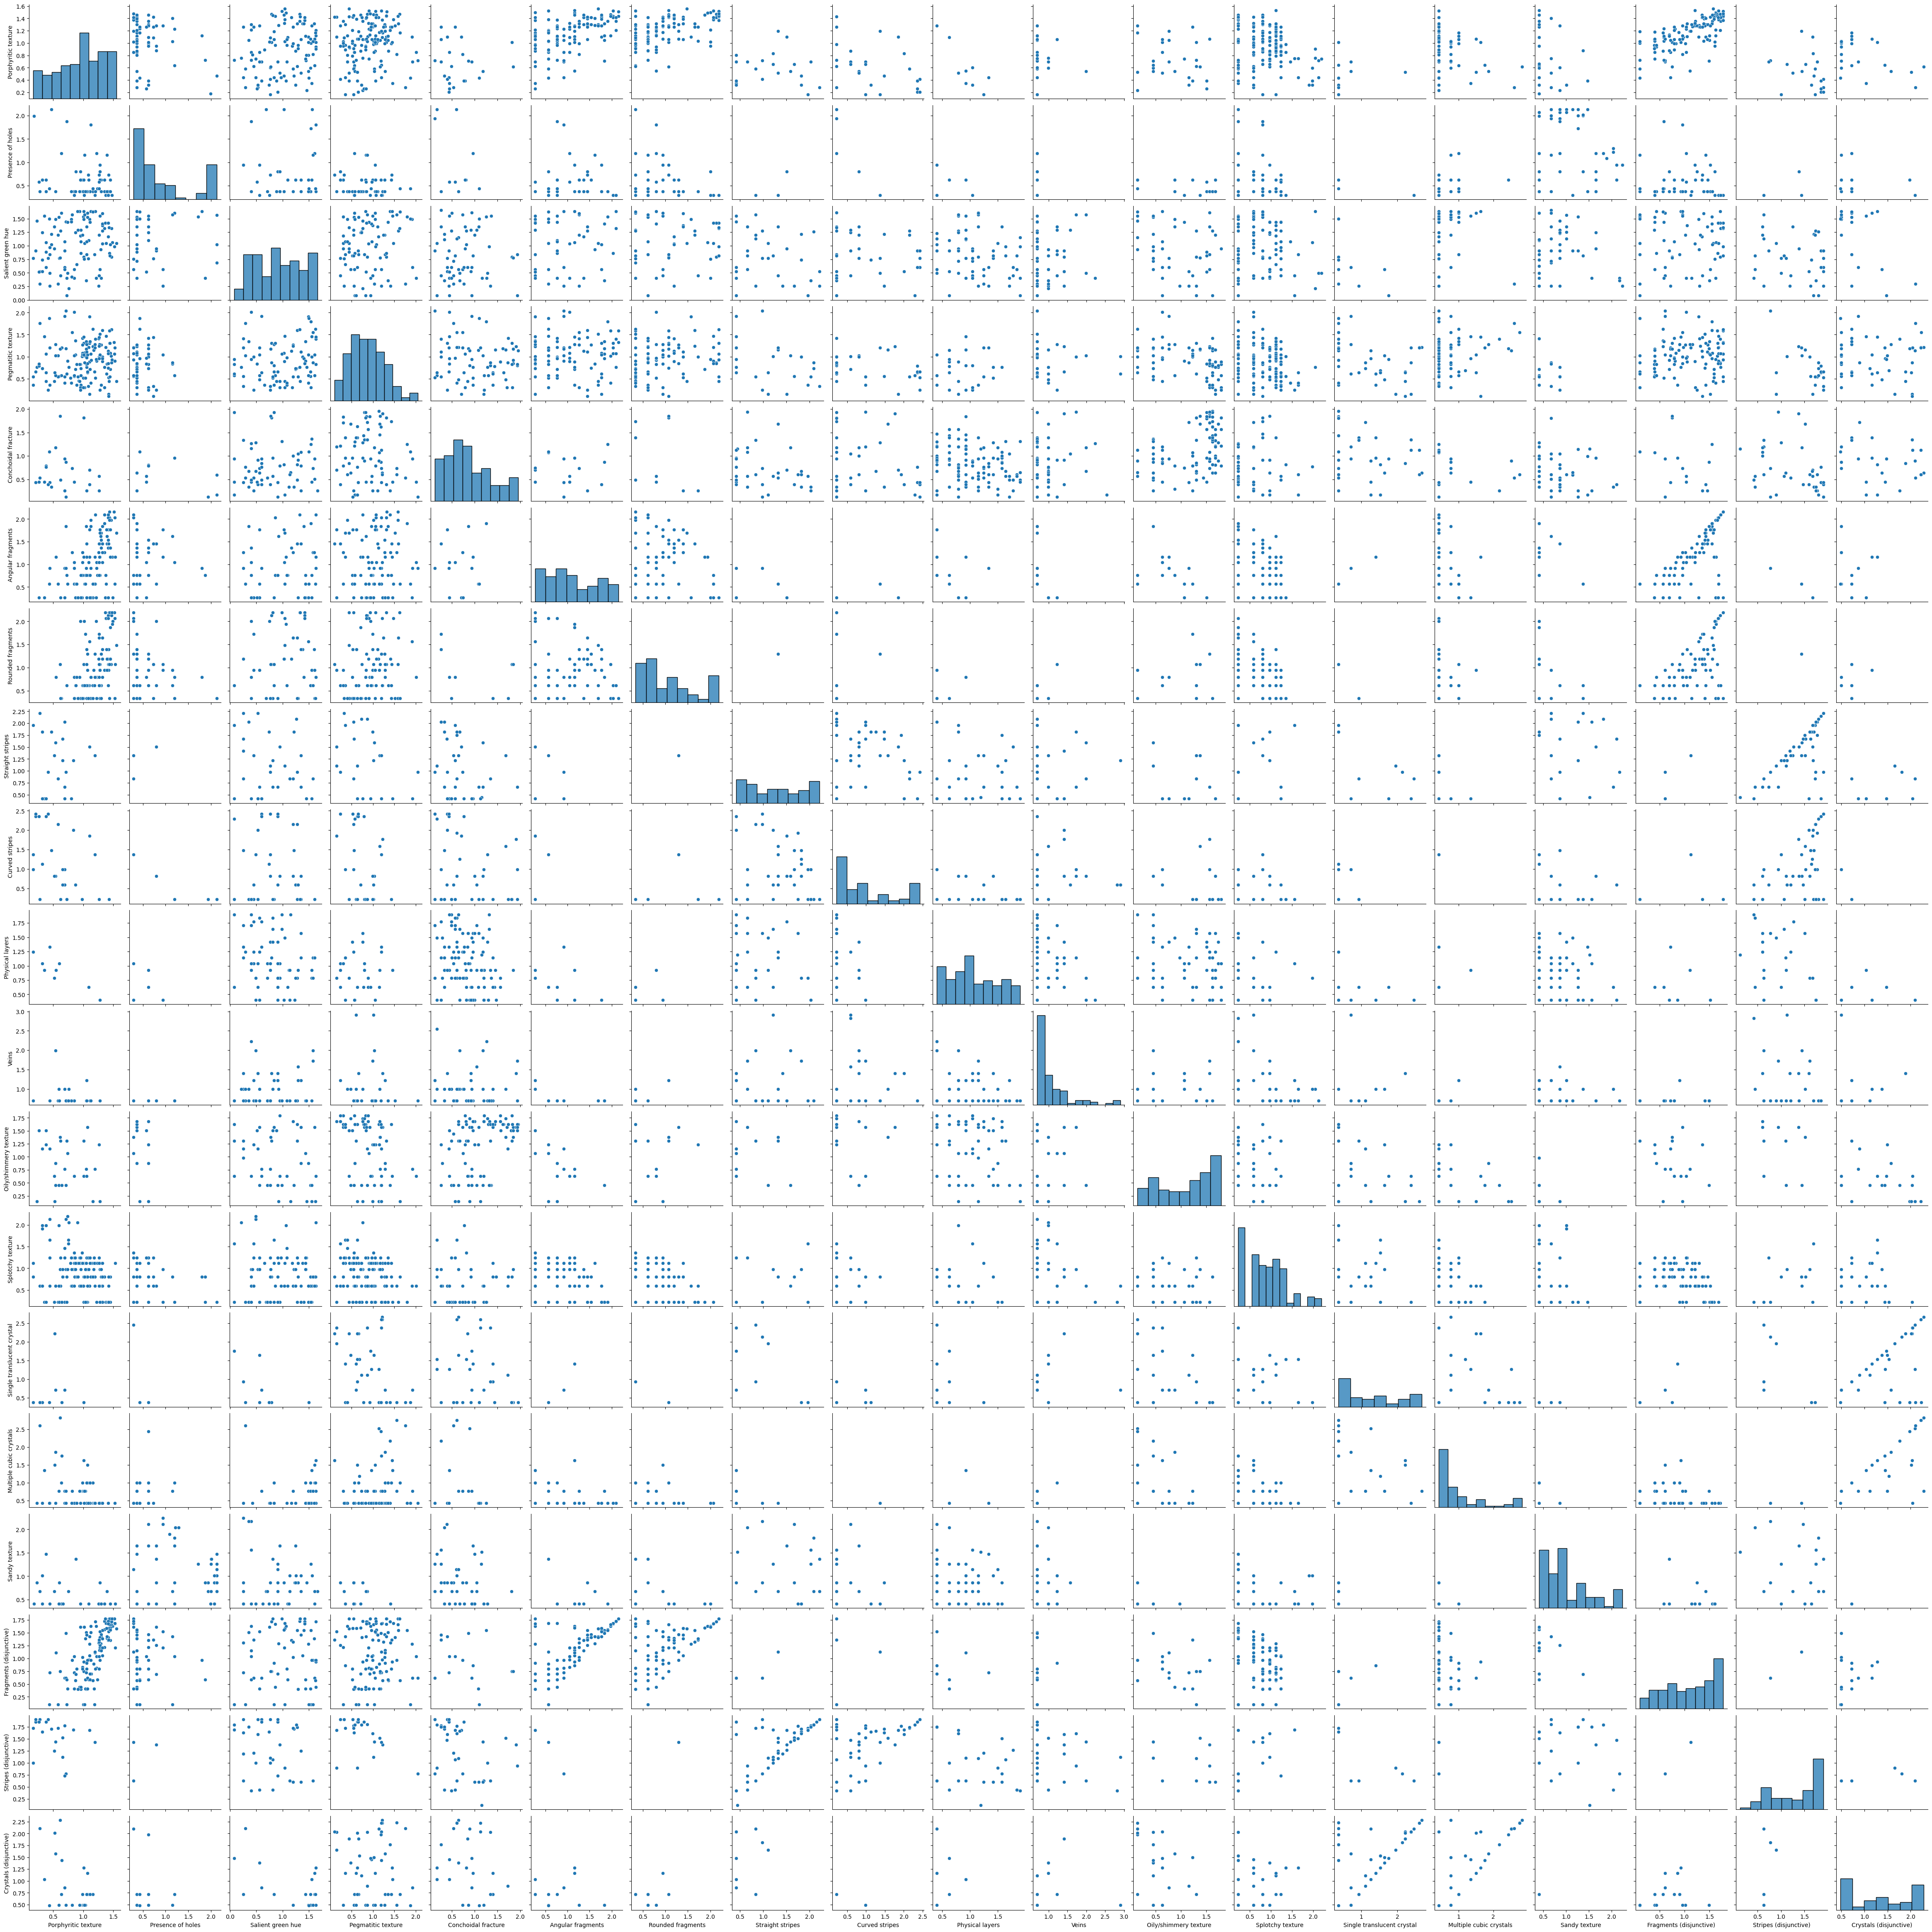

In [ ]:
correlation_matrix = features.corr()
print(correlation_matrix)
# Generate scatter plots for key attribute pairs
sns.pairplot(features)
plt.show()

**PCC between label (rock category) and attributes**

In [ ]:
# Compute PCC between label (rock category) and attributes
correlation_matrix = pd.concat([data, features], axis=1).corr()
correlation_with_label = correlation_matrix.iloc[0, 1:]

# Display PCC values for each attribute
print("Pearson Correlation Coefficients with Label:")
print(correlation_with_label)

Pearson Correlation Coefficients with Label:
Porphyritic texture          -0.005857
Presence of holes            -0.290920
Salient green hue            -0.167203
Pegmatitic texture            0.000258
Conchoidal fracture          -0.139519
Angular fragments             0.240665
Rounded fragments             0.406914
Straight stripes              0.032348
Curved stripes               -0.166212
Physical layers              -0.080302
Veins                         0.029302
Oily/shimmery texture        -0.179055
Splotchy texture             -0.106322
Single translucent crystal    0.493506
Multiple cubic crystals       0.588832
Sandy texture                 0.283502
Fragments (disjunctive)       0.477796
Stripes (disjunctive)        -0.202934
Crystals (disjunctive)        0.697814
Name: rock category, dtype: float64


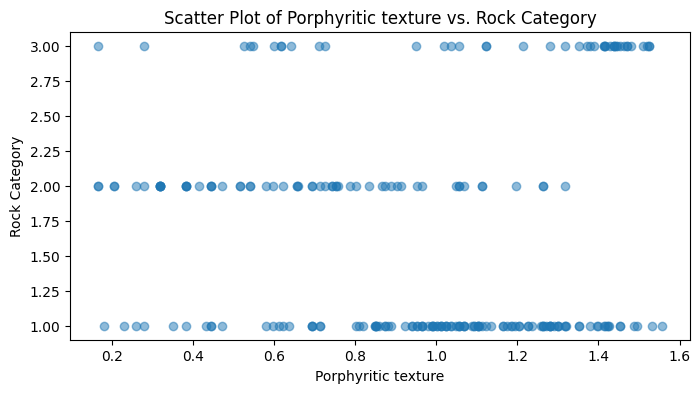

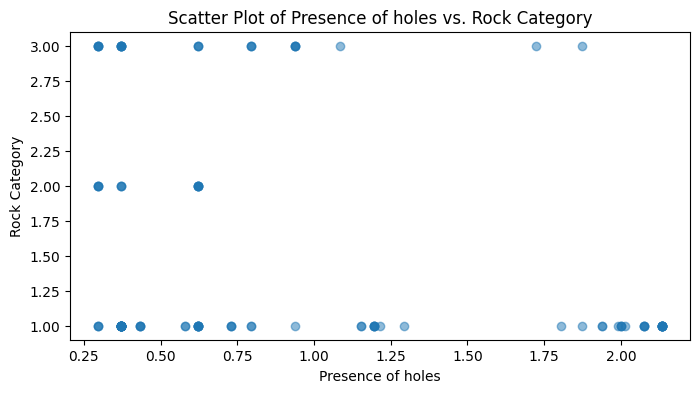

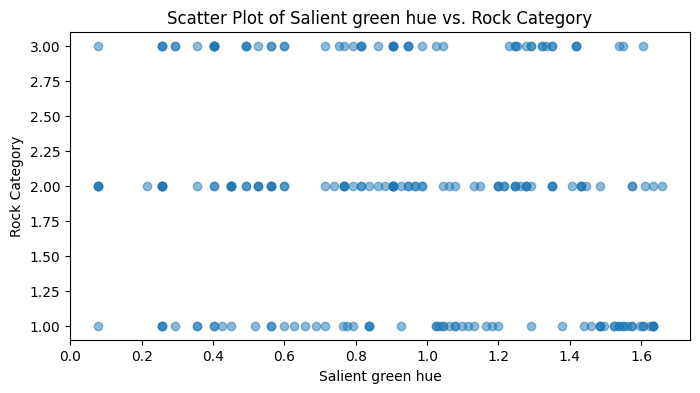

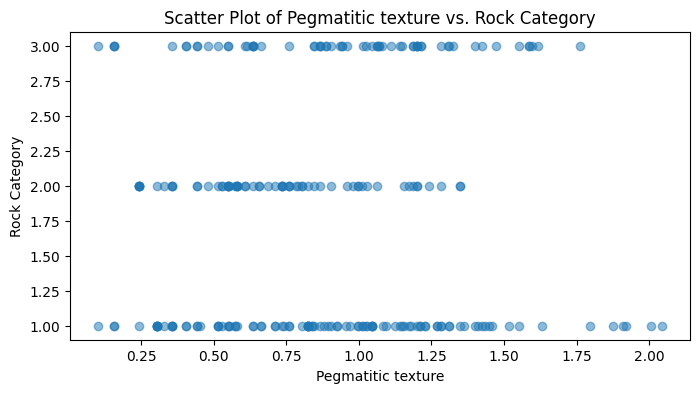

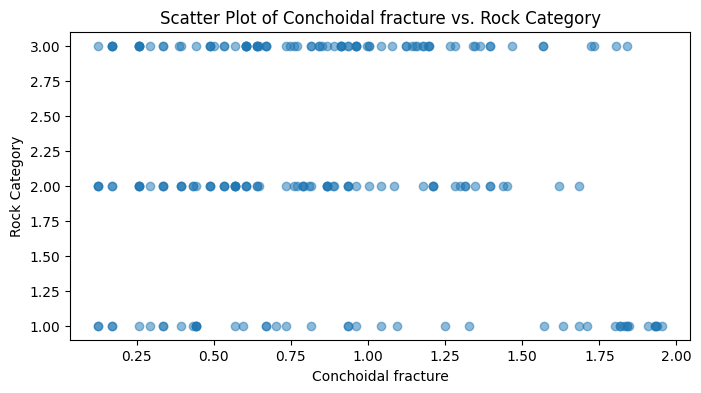

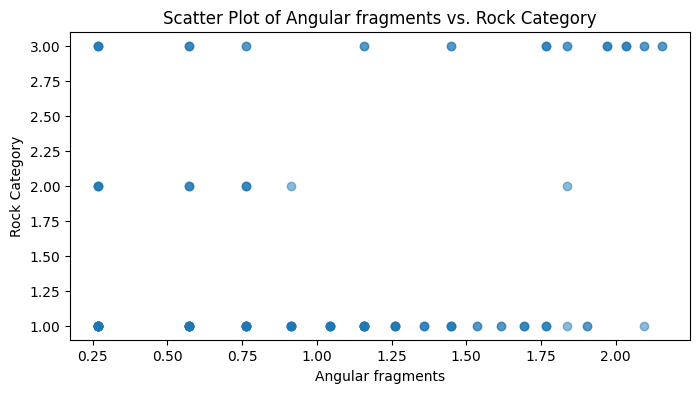

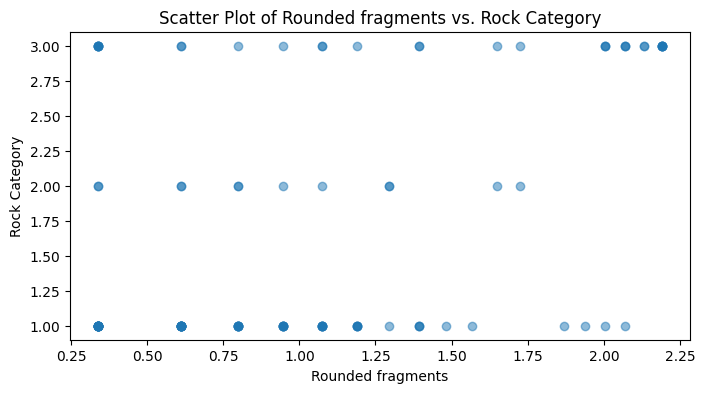

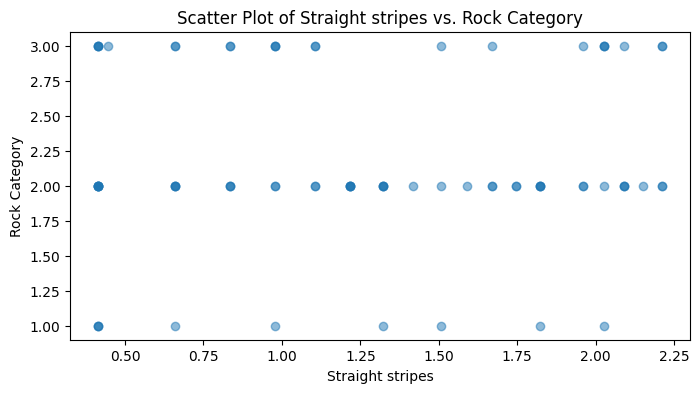

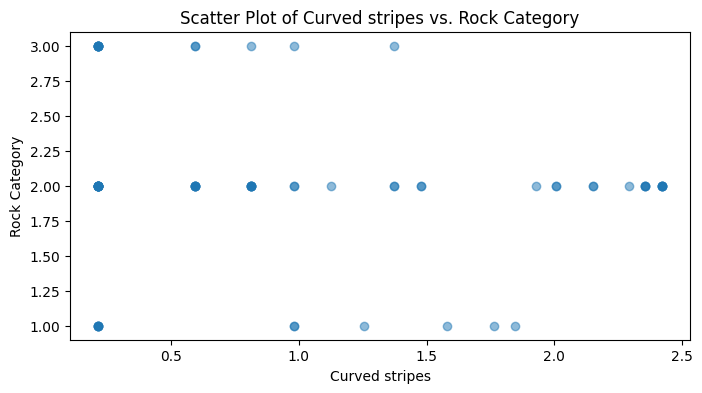

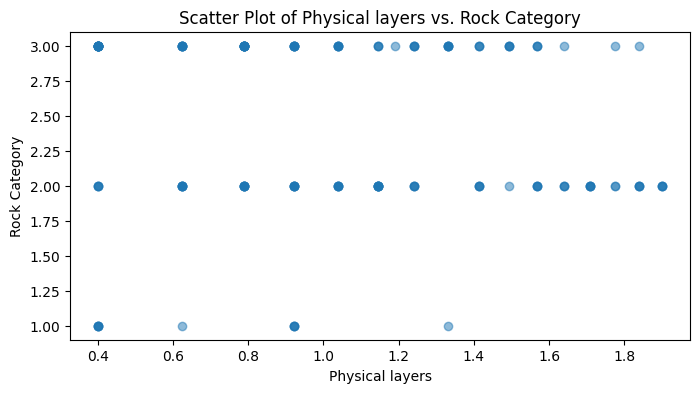

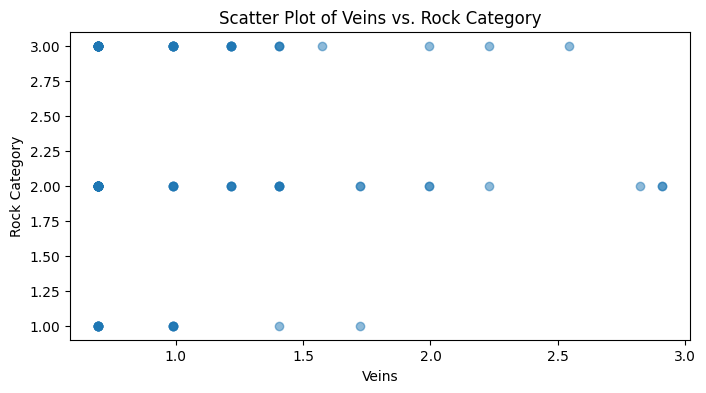

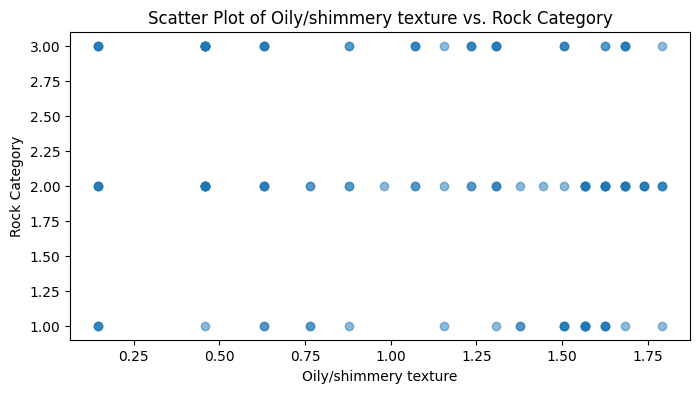

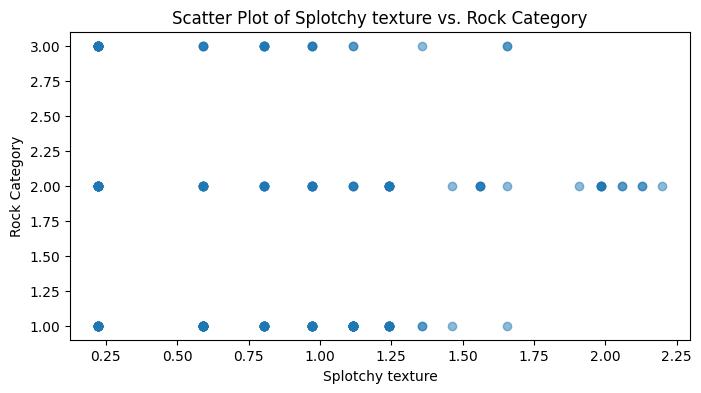

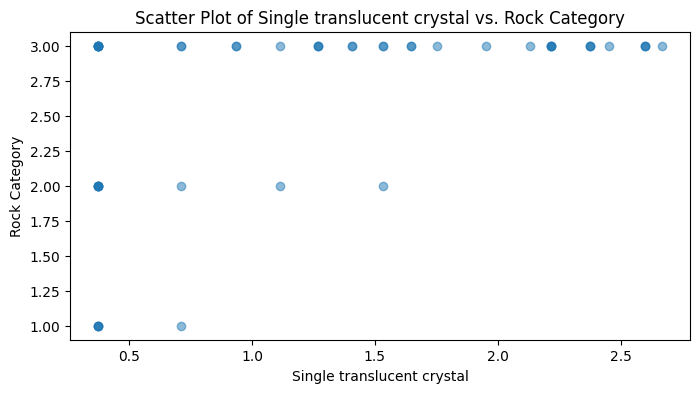

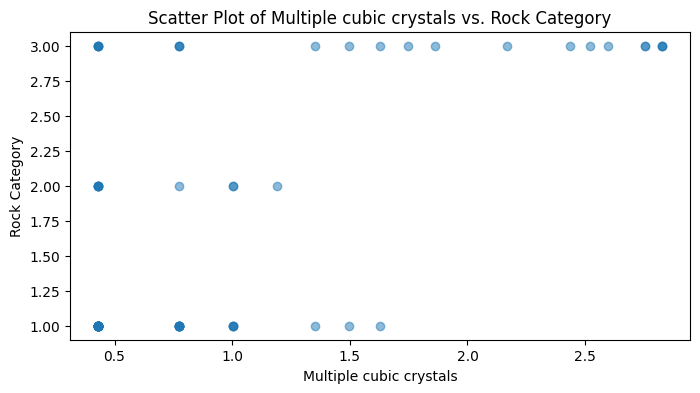

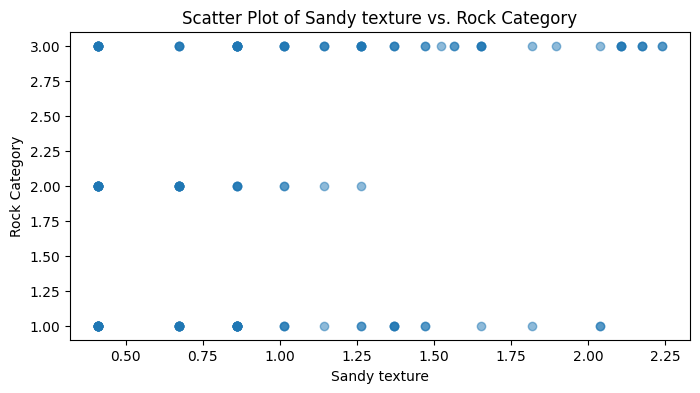

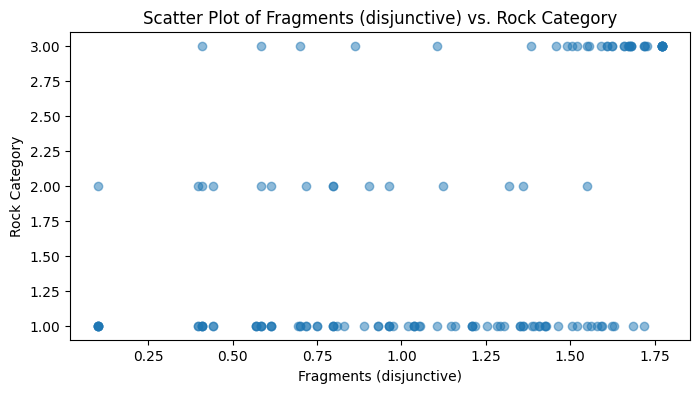

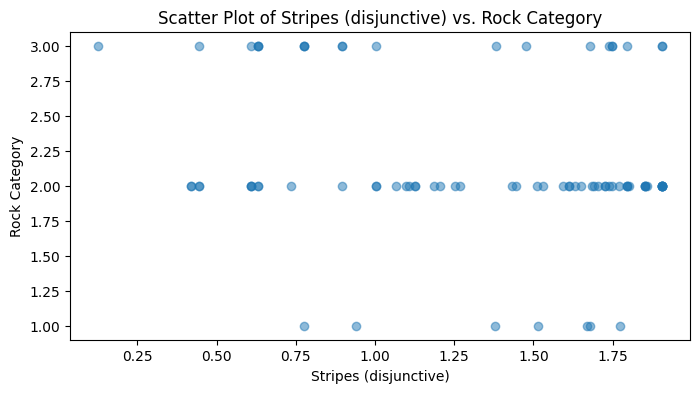

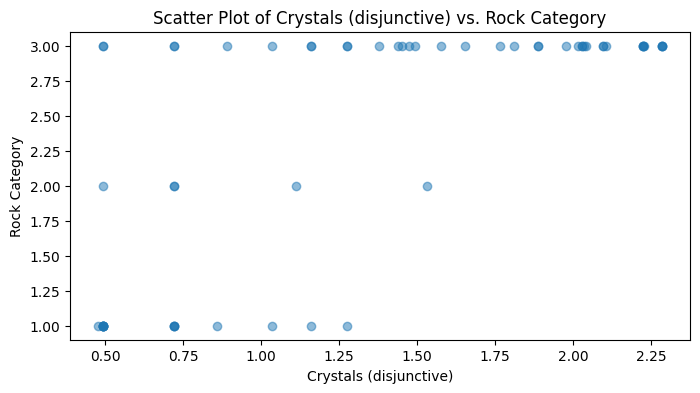

In [ ]:
# Combine the label and features into a single DataFrame
df = pd.concat([data, features], axis=1)
# Generate scatter plots for each attribute against the "rock category" label
for column in features.columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[column], df["rock category"], alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs. Rock Category')
    plt.xlabel(column)
    plt.ylabel("Rock Category")
    plt.show()

Relationships between the attributes and the label:

- Strong positive correlations with the label are observed for attributes like "Crystals (disjunctive)," "Multiple cubic crystals," and "Single translucent crystal," indicating that higher values of these attributes correspond to higher values of the label.

- Moderate positive correlations are found for attributes such as "Presence of holes," "Sandy texture," and "Fragments (disjunctive)."

- Attributes like "Rounded fragments" and "Angular fragments" also exhibit positive correlations but with a more modest strength.

- On the other hand, attributes with negative correlations, such as "Veins," are inversely related to the label, with higher attribute values associated with lower label values.

- Some attributes, like "Porphyritic texture" and "Pegmatitic texture," exhibit minimal correlations with the label.

These correlation coefficients provide valuable insights into the relationships between attributes and the label, helping to identify which attributes are more influential in predicting the label's values.

**Dropping the attributes which are less correlated with label**

In [ ]:
# Drop the specified columns from the DataFrame
features_updated=features.copy()
features_updated.drop(columns=[features_updated.columns[0], features_updated.columns[3], features_updated.columns[7], features_updated.columns[9], features_updated.columns[10]],axis=1)

,Salient green hue,Conchoidal fracture,Rounded fragments,Curved stripes,Oily/shimmery texture,Single translucent crystal,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
0,-0.530724,-0.482150,0.375313,-0.260224,-0.540653,-0.227922,2.042938,-0.409247,-0.034059
1,0.858984,-0.443857,-0.405184,-0.260224,-0.540653,-0.227922,1.665865,-0.409247,-0.310419
2,-0.415333,-1.120369,4.017633,-0.260224,-0.540653,-0.227922,2.640737,-0.409247,-0.310419
3,1.129901,-1.082076,3.757467,-0.260224,-0.540653,-0.227922,2.659131,-0.409247,-0.310419
4,-0.570860,-0.609794,0.895644,-0.260224,-0.353270,-0.227922,1.481927,-0.409247,-0.310419
...,...,...,...,...,...,...,...,...,...
534,-0.435401,-1.126751,-0.405184,-0.260224,-0.540653,-0.227922,-0.541391,-0.409247,5.216791
535,-0.957168,0.066717,-0.405184,0.045922,-0.540653,-0.227922,-0.541391,3.054169,-0.310419
536,0.066299,-1.088458,-0.405184,-0.260224,-0.540653,-0.227922,-0.541391,-0.409247,-0.310419
537,-0.029024,0.366680,-0.405184,-0.260224,-0.353270,-0.227922,-0.541391,-0.409247,-0.310419


In [ ]:
features_updated.head()

,Presence of holes,Salient green hue,Conchoidal fracture,Angular fragments,Rounded fragments,Curved stripes,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
0,-0.159688,-0.530724,-0.482150,2.865772,0.375313,-0.260224,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
1,-0.407623,0.858984,-0.443857,2.611790,-0.405184,-0.260224,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
2,-0.407623,-0.415333,-1.120369,0.071962,4.017633,-0.260224,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
3,-0.159688,1.129901,-1.082076,1.341876,3.757467,-0.260224,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419
4,0.385768,-0.570860,-0.609794,1.595858,0.895644,-0.260224,-0.353270,0.647619,-0.227922,-0.225045,-0.401124,1.481927,-0.409247,-0.310419


In [ ]:
# Calculate the median for each column in your DataFrame
med=data.median()
medians = features_updated.median()

# Replace null values with the respective column's median
data_filled=data.fillna(med)
features_filled = features_updated.fillna(medians)

# Now, features_filled contains no null values, and missing values have been replaced with medians.


In [ ]:
features_updated.describe()

,Presence of holes,Salient green hue,Conchoidal fracture,Angular fragments,Rounded fragments,Curved stripes,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.000296,0.001199,0.001131,-0.001076,-0.000696,0.000483,0.001003,-0.001756,0.000423,0.000418,0.000216,-0.001180,0.000759,0.000576
std,1.000905,1.000541,1.000583,1.000616,1.000798,1.000866,1.000657,1.000095,1.000881,1.000882,1.000916,1.000553,1.000773,1.000839
min,-0.407623,-1.187950,-1.248012,-0.436004,-0.405184,-0.260224,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.407623,-0.761505,-0.699145,-0.436004,-0.405184,-0.260224,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
50%,-0.407623,-0.375197,-0.271538,-0.436004,-0.405184,-0.260224,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,-0.159688,0.585557,0.360298,-0.182021,-0.145018,-0.260224,-0.165887,0.348718,-0.227922,-0.225045,0.168500,0.001226,-0.207298,-0.310419
max,4.551072,2.750390,3.813059,4.643652,4.798130,5.862693,3.207009,4.832237,7.120010,7.986072,5.010309,3.137369,3.629722,5.216791


In [ ]:
data.describe()

,rock category
count,539.000000
mean,2.001855
std,0.816874
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


**3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset.**

**Splitting the data in testing , validation and training sets correctly**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(features_updated, data, test_size=0.4, random_state=42,shuffle=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Verification of splitting**

In [ ]:
X_train.describe()

,Presence of holes,Salient green hue,Conchoidal fracture,Angular fragments,Rounded fragments,Curved stripes,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.019470,-0.011690,0.022813,0.012987,-0.083803,0.003270,0.024427,0.003547,-0.003844,0.022814,0.030526,-0.040060,0.008846,0.012401
std,1.034486,1.009894,0.992720,1.054023,0.845165,1.012893,1.023931,1.001127,0.989319,1.075398,1.084515,0.959862,1.010766,1.025927
min,-0.407623,-1.187950,-1.165044,-0.436004,-0.405184,-0.260224,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.407623,-0.781573,-0.654469,-0.436004,-0.405184,-0.260224,-0.540653,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
50%,-0.407623,-0.375197,-0.252392,-0.436004,-0.405184,-0.260224,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,-0.159688,0.588066,0.366680,-0.182021,-0.145018,-0.260224,-0.165887,0.348718,-0.227922,-0.225045,0.168500,-0.090743,-0.207298,-0.310419
max,4.551072,2.750390,3.749237,4.643652,4.798130,5.862693,3.207009,4.832237,7.120010,7.986072,5.010309,3.137369,3.629722,5.216791


In [ ]:
X_test.describe()

,Presence of holes,Salient green hue,Conchoidal fracture,Angular fragments,Rounded fragments,Curved stripes,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.036364,-0.010907,-0.045266,-0.026809,0.158508,-0.002268,-0.065255,0.038746,0.020411,-0.137612,-0.060932,0.066286,0.014003,-0.070395
std,1.094160,1.000053,0.985657,0.938079,1.245173,1.008152,0.933029,1.089590,1.009385,0.307698,0.803175,1.101150,1.020383,0.789449
min,-0.407623,-1.147814,-1.248012,-0.436004,-0.405184,-0.260224,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.407623,-0.850557,-0.699145,-0.436004,-0.405184,-0.260224,-0.540653,-0.547986,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
50%,-0.407623,-0.299942,-0.293876,-0.436004,-0.405184,-0.260224,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,-0.159688,0.412471,0.239036,-0.182021,-0.145018,-0.260224,-0.165887,0.348718,-0.227922,-0.225045,-0.045109,0.010423,-0.207298,-0.310419
max,4.551072,2.640017,3.640740,3.373738,4.798130,5.862693,3.207009,4.533336,6.017821,1.827734,5.010309,3.137369,3.629722,4.387709


In [ ]:
X_validation.describe()

,Presence of holes,Salient green hue,Conchoidal fracture,Angular fragments,Rounded fragments,Curved stripes,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,-0.093113,0.051852,-0.017315,-0.017403,0.088649,-0.005102,-0.002794,-0.058120,-0.006804,0.071467,-0.029286,0.047636,-0.036671,0.036183
std,0.779900,0.980274,1.045349,0.899685,1.132048,0.965854,1.001448,0.905929,1.035433,1.198391,0.919365,1.018277,0.958309,1.113127
min,-0.407623,-1.032423,-1.126751,-0.436004,-0.405184,-0.260224,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.407623,-0.686250,-0.708718,-0.436004,-0.405184,-0.260224,-0.540653,-0.846887,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
50%,-0.407623,-0.375197,-0.376845,-0.436004,-0.405184,-0.260224,-0.540653,-0.547986,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,-0.159688,0.584303,0.322005,0.071962,-0.145018,-0.260224,-0.165887,0.647619,-0.227922,-0.225045,-0.045109,0.166770,-0.358760,-0.310419
max,4.551072,2.670119,3.813059,4.135686,4.798130,5.556547,3.207009,3.935533,6.752614,7.986072,4.725496,3.137369,3.629722,5.216791


If we look at the data given by test and validate describe , the mean , median and standard deviation and the quartile range looks similiar. This means test, validate portion of the data is the representative of the entire dataset.

**4.Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters**

**Multinomial Logistic Regression**

**Model is implemented correctly**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

**Different hyperparameters (C, solver,max number of iterations) have been tried**

In [ ]:
# Create a Multinomial Logistic Regression model
model1 = LogisticRegression(multi_class='multinomial')

# Define a parameter grid for hyperparameter tuning
param_grid1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 100, 1000]
}

In [ ]:
# Initialize GridSearchCV with the model and parameter grid
grid_search_logistic = GridSearchCV(model1, param_grid1, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_logistic.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

**Discussion on the impact of different hyper parameters has been done**

In [ ]:
print("Best Hyperparameters:")
print(grid_search_logistic.best_params_)

Best Hyperparameters:
{'C': 1, 'max_iter': 10, 'solver': 'lbfgs'}


I used grid search and found hyperparameters with C=1 and solver= newton-cg are the best ones.

**Training, Validation and Testing Performance have been reported**

In [ ]:
# Use the best model from the grid search
best_model_logistic= grid_search_logistic.best_estimator_

# Function to report performance metrics
def report_metrics(X, y, label):
    y_pred = best_model_logistic.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"{label} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Report performance metrics for training, validation, and testing
report_metrics(X_train, y_train, "Training")
report_metrics(X_validation, y_validation, "Validation")
report_metrics(X_test, y_test, "Testing")

Training Performance Metrics:
Accuracy: 0.6935
Precision: 0.6994
Recall: 0.6935
F1 Score: 0.6922
Validation Performance Metrics:
Accuracy: 0.5833
Precision: 0.6654
Recall: 0.5833
F1 Score: 0.5696
Testing Performance Metrics:
Accuracy: 0.6111
Precision: 0.6433
Recall: 0.6111
F1 Score: 0.6040


**Support vector machines**

**Model is implemented correctly**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Different hyperparameters (C, Kernel, Gamma, degree) have been tried**

In [ ]:
# Create an SVM model
model2 = SVC()

# Define a parameter grid for hyperparameter tuning
param_grid2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Degree of polynomial kernel (only for 'poly' kernel)
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
}

In [ ]:
# Initialize GridSearchCV with the model and parameter grid
grid_search_svm= GridSearchCV(model2, param_grid2, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

**Discussion on the impact of different hyper parameters has been done**

In [ ]:
print("Best Hyperparameters:")
print(grid_search_svm.best_params_)

Best Hyperparameters:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


I used grid search and found hyperparameters with 'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf' are the best ones.

**Training, Validation and Testing Performance have been reported**

In [ ]:
# Use the best model from the grid search
best_model_svm = grid_search_svm.best_estimator_

# Report performance metrics for training, validation, and testing
def report_metrics(X, y, label):
    y_pred = best_model_svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"{label} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
report_metrics(X_train, y_train, "Training")
report_metrics(X_validation, y_validation, "Validation")
report_metrics(X_test, y_test, "Testing")


Training Performance Metrics:
Accuracy: 0.8607
Precision: 0.8605
Recall: 0.8607
F1 Score: 0.8606
Validation Performance Metrics:
Accuracy: 0.7500
Precision: 0.7822
Recall: 0.7500
F1 Score: 0.7504
Testing Performance Metrics:
Accuracy: 0.7315
Precision: 0.7544
Recall: 0.7315
F1 Score: 0.7336


**Random Forest classifier**

**Model is implemented correctly**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**Different hyperparameters(no. of trees, max depth ,the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node) have been tried:**

In [ ]:
# Create a Random Forest classifier model
model3 = RandomForestClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid3 = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize GridSearchCV with the model and parameter grid
grid_search_rf= GridSearchCV(model3, param_grid3, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

**Discussion on the impact of different hyper parameters has been done**

In [ ]:
print("Best Hyperparameters:")
print(grid_search_rf.best_params_)

Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


I used grid search and found hyperparameters with 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5 are the best ones.

**Training, Validation and Testing Performance have been reported**

In [ ]:
# Use the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Analyze feature importance
feature_importance = best_model_rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)

# Report performance metrics for training, validation, and testing
def report_metrics(X, y, label):
    y_pred = best_model_rf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"{label} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
report_metrics(X_train, y_train, "Training")
report_metrics(X_validation, y_validation, "Validation")
report_metrics(X_test, y_test, "Testing")


Feature Importance:
                       Feature  Importance
0            Presence of holes    0.126270
2          Conchoidal fracture    0.125784
10               Sandy texture    0.112595
1            Salient green hue    0.104394
7             Splotchy texture    0.091667
11     Fragments (disjunctive)    0.084664
12       Stripes (disjunctive)    0.068407
13      Crystals (disjunctive)    0.067988
6        Oily/shimmery texture    0.057314
3            Angular fragments    0.053178
4            Rounded fragments    0.035871
5               Curved stripes    0.033687
9      Multiple cubic crystals    0.019805
8   Single translucent crystal    0.018376
Training Performance Metrics:
Accuracy: 0.9721
Precision: 0.9724
Recall: 0.9721
F1 Score: 0.9721
Validation Performance Metrics:
Accuracy: 0.6667
Precision: 0.7091
Recall: 0.6667
F1 Score: 0.6696
Testing Performance Metrics:
Accuracy: 0.7593
Precision: 0.7780
Recall: 0.7593
F1 Score: 0.7580


**5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.**

**Ensemble classifier has been implemented via all the models with the best hyperparameters and Accuracy of the ensemble is greater than all the individual classifiers**

**Voting classifier(hard)**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier with the best models
ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_model_logistic),
    ('svm', best_model_svm),
    ('random_forest', best_model_rf)
], voting='hard')  # Use 'hard' voting to make decisions based on majority votes

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble model on the validation set
y_val_pred = ensemble_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_val_pred)

# Print the validation accuracy
print(f"Validation Accuracy: {validation_accuracy:.2f}")

Validation Accuracy: 0.69


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting ensemble with the best models

ensemble = GradientBoostingClassifier(
    n_estimators=100,  # Adjust the number of estimators as needed
    learning_rate=0.05,  # Adjust the learning rate as needed
    random_state=42  # Set a random seed for reproducibility
)

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble model on the validation set
y_val_pred1 = ensemble.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_val_pred1)

# Print the validation accuracy
print(f"Validation Accuracy: {validation_accuracy:.2f}")

Validation Accuracy: 0.74


**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost ensemble with the best models
ensemble = AdaBoostClassifier(
    base_estimator=best_model_rf,  # Specify a base estimator (e.g., the best Logistic Regression model)
    n_estimators=100,  # Adjust the number of estimators as needed
    learning_rate=0.05,# Adjust the learning rate as needed
    random_state=42,  # Set a random seed for reproducibility
)

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble model on the validation set
y_val_pred = ensemble.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_val_pred)

# Print the validation accuracy
print(f"Validation Accuracy: {validation_accuracy:.2f}")


Validation Accuracy: 0.70


**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create a Bagging ensemble with the best models
ensemble = BaggingClassifier(
    base_estimator=best_model_svm,  # Replace with the best models
    n_estimators=10,  # Adjust the number of base estimators as needed
    random_state=42  # Set a random seed for reproducibility
)

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble model on the validation set
y_val_pred = ensemble.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_val_pred)

# Print the validation accuracy
print(f"Validation Accuracy: {validation_accuracy:.2f}")

Validation Accuracy: 0.76


**Test set Accuracy**

In [ ]:
y_test_pred = ensemble.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.74


**Discussion on Findings**

We found that ensemble method with bagging classifier gave best accuracy when compared with all other classifiers


we created a Bagging ensemble using the best SVM model as the base estimator.
The Bagging ensemble has 10 base estimators.
we reported the accuracy of this ensemble on the validation set and the test set.
Bagging is a technique that combines multiple base models to reduce variance and enhance model stability.